# Introduction
The idea of this notebook is to explore a step-by-step approach to create a <b>single layer neural network</b> without the help of any third party library. In practice, this neural network should be useful enough to generate a simple non-linear regression model, though it's final goal is to help us understand the inner workings of one.

![image](images/simpleneuralnetwork.jpg)

## Working Data

First we will create a <b>secret function</b> that will generate a test score based on students hours of sleep and study. Note that in real life scenarios not only these secret functions will be unknown but in practice they usually dont exist, meaning, underlying relations between variables such as a Sleep and Study is far more complex and cannot be defined by a simple continuous function.
    
Additionally, as we will later observe, we expect that our neural network should provide us good approximations or predictors of the score but the actual secret function will remain unknown. In other works, we will only have a different, complex continuous function in which its output should be enough to approximate the original one.

In [1]:
# Our secret function
secretFunction <- function(x) {
  y <- (x[,1]^2 + x[,2]^2)
  return(t(t(y)))
}
print("Secret Function loaded")

[1] "Secret Function loaded"


Let's assume a sample of 9 students, where each one had 3 days (72 hours) prior to the test and they either slept or studied.

In [2]:
# Our train (X) and test (xTest) data
Study <- round(runif(9,1,24))
Sleep <- 72 - Study
X <- data.frame(Study=Study,Sleep=Sleep)
xTest = rbind(c(3,7),c(2,8))

# We generate our Y train (y)
y <- secretFunction(X)

In [3]:
# This is our Study, Sleep and Score table
cbind(X,Score=y)

Study,Sleep,Score
<dbl>,<dbl>,<dbl>
12,60,3744
13,59,3650
12,60,3744
20,52,3104
17,55,3314
9,63,4050
13,59,3650
21,51,3042
8,64,4160


## Generating the model

### Functions

<b>First, we need some functions to be defined:</b>
- <b>Rand</b>: Generate random numbers
- <b>Sigmoid</b>: Our non-linear activation function to be executed by our Sigmoid neuron.
- <b>Forward</b>: Our forward propagation function.
- <b>Sigmoid Prime</b>: Gradient of our Sigmoid function for Backward Propagation.
- <b>Cost</b>: Cost calculation funtion (sum of squared errors)


In [4]:
# Random Function
rand <- function(x) { 
  return(runif(1, 5, 100)/100) 
}

# Sigmoid Function
sigmoid <- function(x) {
  return(1/(1+exp(1)^-x))
}

# Forward Propagation Function
Forward <- function(X,w1,w2) {
  X <- cbind(X[,1],X[,1])
  z2 <- X %*% w1
  a2 <- sigmoid(z2)
  z3 <- a2 %*% w2
  yHat <- sigmoid(z3)
  return(yHat)
}

# Sigmoid Gradient Function
sigmoidPrime <- function(x) {
  return((exp(1)^-x)/(1+(exp(1)^-x))^2)
}

# Cost Function
cost <- function(y,yHat) {
  sum(((yHat-y)^2)/2)
}
print("Functions loaded")

[1] "Functions loaded"


### Parameter Initialization

Next, we need to define our parameters.
We have two sets of parameters:
- <b>Hyperparameters:</b> Parameters that the network cannot learn and are pre-defined.
    - <b>Number of hidden layers:</b> In this case we have 1, since it's a simple single layered neural network.
    - <b>Number of Neurons of hidden layers:</b> We will use 6.
    - <b>Learning Rate:</b> We will use 2.
- <b>Learning Parameters:</b> Parameters that our network will learn.
    - <b>Weights:</b> We will use 2 weights since by design we will need at leas N+1 weights where N is equivalent to the number of Hidden Layers.


In [5]:
# Hyperparameters
inputLayerSize = ncol(X)
outputLayerSize = 1 # Dimension of outputs (1 since it's only score)
hiddenLayerSize = 6 # Number of neurons
LearningRate <- 2

# Weights
w1 <- matrix(runif(inputLayerSize*hiddenLayerSize), nrow = inputLayerSize, ncol = hiddenLayerSize )
w2 <- matrix(runif(hiddenLayerSize*outputLayerSize), nrow = hiddenLayerSize, ncol = outputLayerSize )
print("Parameter initialization completed")

[1] "Parameter initialization completed"


### Data Normalization

In [6]:
# We normalize train data
X = X/max(X)
y = y/max(y)

# We normnalize test data
xTest <- xTest/max(X)
yTest <- secretFunction(xTest)/max(y)
print("Data normalization completed")

[1] "Data normalization completed"


### Forward Propagation

In [7]:
# We propagate
yHat <- Forward(X,w1,w2)
print("Forward propagation completed")

[1] "Forward propagation completed"


### Cost Calculation

In [8]:
# We calculate cost
J <- sum(((yHat-y)^2)/2)
J

[1] 0.0406941

### We evaluate the results

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



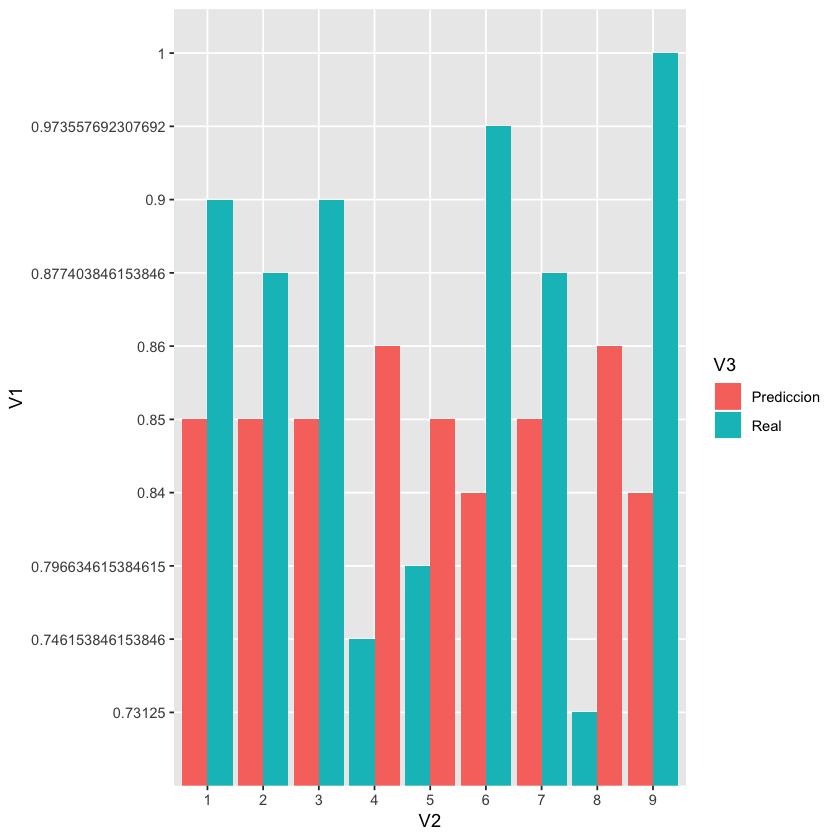

In [9]:
library(ggplot2)
resultPlot <- as.data.frame(rbind(cbind(y,1:nrow(y),"Real"),cbind(round(yHat,2),1:nrow(yHat),"Prediccion")))
ggplot(resultPlot, aes(x=V2, y=V1, fill=V3)) + geom_bar(stat="identity", position="dodge")

### Back propagation

In [10]:
# We derivate W2 in respect to the cost
dJdW2 <- function(X,w1,w2) { 
  X <- cbind(X[,1],X[,1])
  z2 <- X %*% w1
  a2 <- sigmoid(z2)
  z3 <- a2 %*% w2
  yHat <- sigmoid(z3)
  delta3 <- -(y-yHat)*sigmoidPrime(z3)
  cost <- t(a2) %*% delta3
  return(cost)
}

# We adjust W2
w2 <- w2 - (LearningRate * dJdW2(X,w1,w2))

# We derivate W1 in respect to the cost
dJdW1 <- function(X,w1,w2) { 
  X <- cbind(X[,1],X[,1])
  z2 <- X %*% w1
  a2 <- sigmoid(z2)
  z3 <- a2 %*% w2
  yHat <- sigmoid(z3)
  delta3 <- -(y-yHat)*sigmoidPrime(z3)
  delta2 <- (delta3 %*% t(w2)) * sigmoidPrime(z2)
  cost <- t(X) %*% delta2
  return(cost)
}
w1 <- w1 - (LearningRate * dJdW1(X,w1,w2))
print("Back propagation completed")

[1] "Back propagation completed"


### We forward propagate again

In [11]:
# We propagate Again!
yHat <- Forward(X,w1,w2)
print("Forward propagation completed")

[1] "Forward propagation completed"


### New Cost Calculation

In [12]:
# We calculate cost
J <- sum(((yHat-y)^2)/2)
J

[1] 0.03941419

<b>Note:</b> We should observe a small improvement in cost due to the new parameters.

### We evaluate again

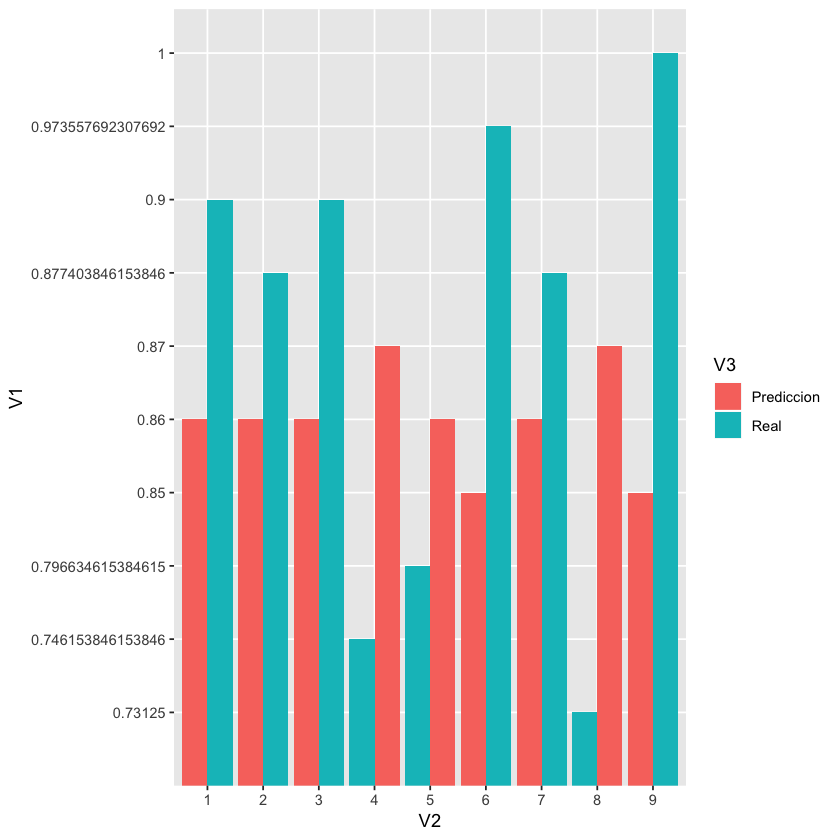

In [13]:
library(ggplot2)
resultPlot <- as.data.frame(rbind(cbind(y,1:nrow(y),"Real"),cbind(round(yHat,2),1:nrow(yHat),"Prediccion")))
ggplot(resultPlot, aes(x=V2, y=V1, fill=V3)) + geom_bar(stat="identity", position="dodge")

### Backpropagate, Forwardpropagate and repeat

We will now repeat the previous process until we cannot minimize our cost any more.
When this happens, it means we have found a <b>local minima</b>. We will stop when we observe that error calculated at <b>step n+1</b> is equal or superior than the one found in <b>step n</b>, meaning we cannot improve any more with out jumping around the local minima.

In [14]:
costTrain <- data.frame(Training=NA,Cost=NA)
costTest <- data.frame(Training=NA,Cost=NA)
InitialError <- sum((y-yHat)^2)
FinalError <- 0
i <- 1

while(round(FinalError,5) <= round(InitialError,5)) {
  w1 <- w1 - (LearningRate * dJdW1(X,w1,w2))
  w2 <- w2 - (LearningRate * dJdW2(X,w1,w2))
  yHat = Forward(X,w1,w2)
  costo <- cost(y,yHat)

  costTrain[i,]$Training <- i
  costTrain[i,]$Cost <- costo
  
  FinalError <- sum((y-yHat)^2)

  i <- i + 1
  if(i %% 1000==0) {
    # Print on the screen some message
    cat(paste0("Iteration ", i,": ",FinalError,"\n"))
  }
  if(i == 30000) {
      break()
  }
}

Iteration 1000: 0.00481584089668459
Iteration 2000: 0.0041359734308611
Iteration 3000: 0.00393871947102891
Iteration 4000: 0.00372143672994218
Iteration 5000: 0.00349248060524413
Iteration 6000: 0.00326134930936602
Iteration 7000: 0.00303633770539048
Iteration 8000: 0.0028234085677745
Iteration 9000: 0.00262605678298945
Iteration 10000: 0.00244575603038661
Iteration 11000: 0.00228257085383198
Iteration 12000: 0.00213570371719112
Iteration 13000: 0.00200390180557296
Iteration 14000: 0.00188572744690734
Iteration 15000: 0.00177972281833611
Iteration 16000: 0.00168450161210436
Iteration 17000: 0.00159879386769361
Iteration 18000: 0.00152146252140866
Iteration 19000: 0.00145150388690322
Iteration 20000: 0.00138803971122357
Iteration 21000: 0.00133030539309178
Iteration 22000: 0.00127763699851438
Iteration 23000: 0.00122945850621331
Iteration 24000: 0.00118526999666641
Iteration 25000: 0.00114463708252138
Iteration 26000: 0.00110718164679011
Iteration 27000: 0.00107257383403121
Iteration 28

### We evaluate again

Initial Error: 0.0788283847249415
Final Error: 0.000983124206808979
Improvement: 99%
Took 30000 Iterations

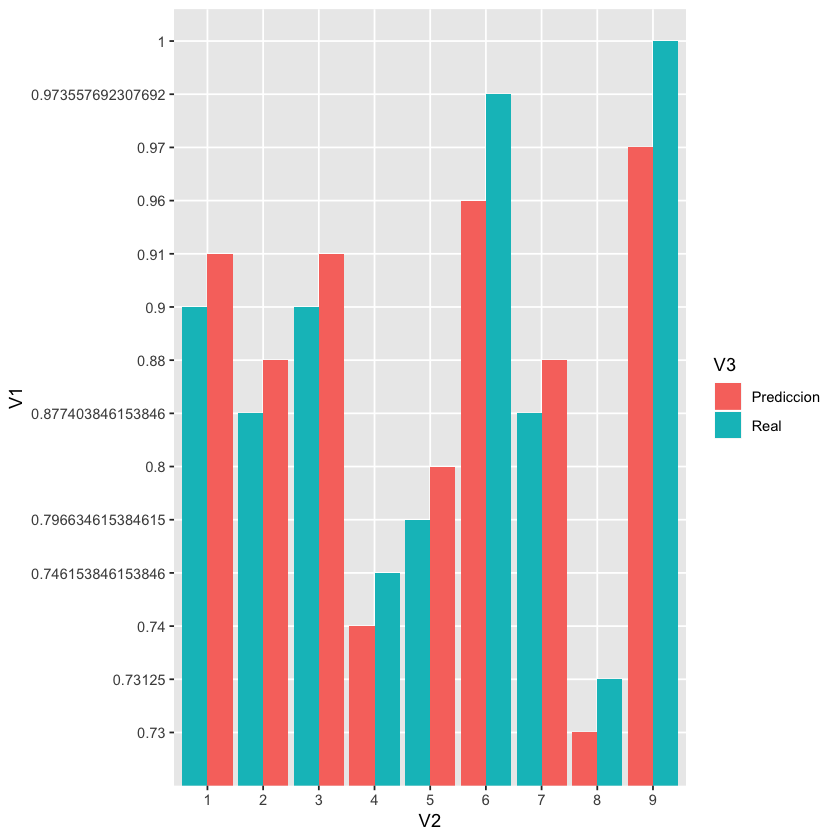

In [15]:
library(ggplot2)
resultPlot <- as.data.frame(rbind(cbind(y,1:nrow(y),"Real"),cbind(round(yHat,2),1:nrow(yHat),"Prediccion")))
ggplot(resultPlot, aes(x=V2, y=V1, fill=V3)) + geom_bar(stat="identity", position="dodge")
Improvement <- (InitialError-FinalError)/InitialError
cat(paste("Initial Error: ",InitialError,"
Final Error: ",FinalError,"
Improvement: ",round(Improvement,2)*100,"%
Took ",i," Iterations",sep=""))

As seen in the results above it seems our model was able to predict very similar scores to our "Secret Function", even though the actual model is a mix of a more complex combination of vector products and non-linear functions. This means our new model approximates quite well our actual "Secret Function Model".

### How our training improved our model?

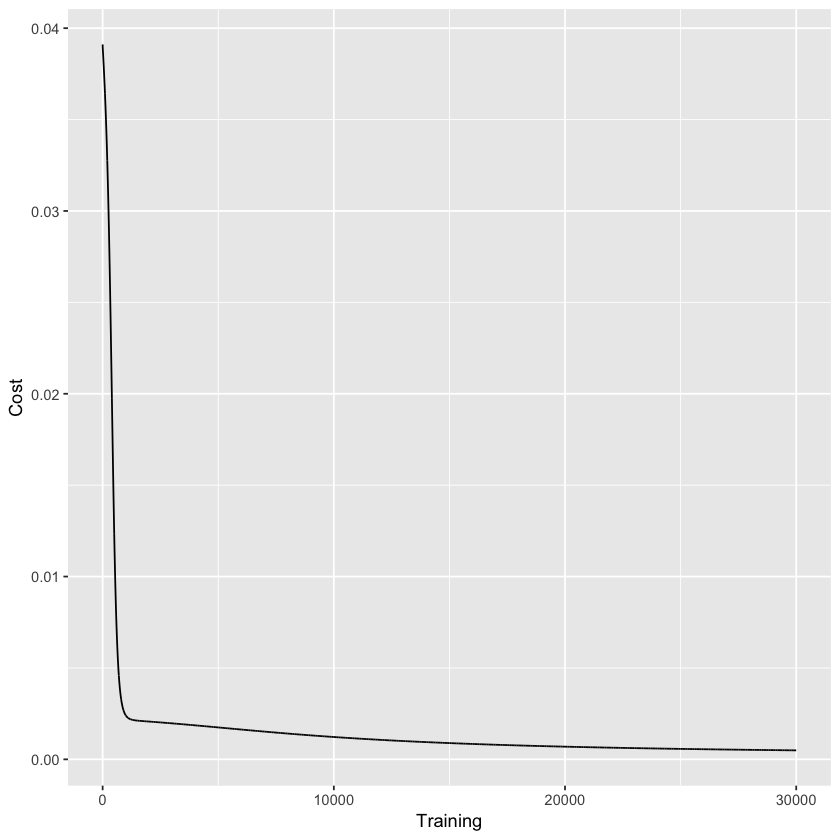

In [16]:
costTrain$Data <- "Train"
ggplot(costTrain, aes(x=Training, y=Cost)) + geom_line()

As seen above it seems that there was little cost improvement after 1k iterations.

### Evaluation on known (in sample) Data

In [17]:
Train <- X

In [18]:
# Note: this output represents a normalized representation of Study and Sleep
cbind(Train,RealScore=secretFunction(Train),PredictedScore=Forward(Train,w1,w2))

Study,Sleep,RealScore,PredictedScore
<dbl>,<dbl>,<dbl>,<dbl>
0.187500,0.937500,0.9140625,0.9051446
0.203125,0.921875,0.8911133,0.8827864
0.187500,0.937500,0.9140625,0.9051446
0.312500,0.812500,0.7578125,0.7440203
0.265625,0.859375,0.8090820,0.7953386
0.140625,0.984375,0.9887695,0.9608078
0.203125,0.921875,0.8911133,0.8827864
0.328125,0.796875,0.7426758,0.7301721
0.125000,1.000000,1.0156250,0.9734991


<b>Lets translate this to our original scale</b>

In [19]:
X <- data.frame(Study=Study,Sleep=Sleep)
y <- secretFunction(X)
cbind(X,Score=secretFunction(X),Prediction=round(Forward(Train,w1,w2)*max(y)))

Study,Sleep,Score,Prediction
<dbl>,<dbl>,<dbl>,<dbl>
12,60,3744,3765
13,59,3650,3672
12,60,3744,3765
20,52,3104,3095
17,55,3314,3309
9,63,4050,3997
13,59,3650,3672
21,51,3042,3038
8,64,4160,4050


As expected, it seems our model provide us very good approximations to actual test scores.

### Evaluation on unknown (out of sample) data

Let's evaluate which test score we should expect from a student who <b>studied 16 hours and slept 56</b>

In [30]:
xTrain <- data.frame(Study=16,Sleep=56)
yTrain <- secretFunction(xTrain)
cbind(xTrain,Score=yTrain)

Study,Sleep,Score
<dbl>,<dbl>,<dbl>
16,56,3392


<b>What is our predicted score?</b>

In [31]:
as.integer(round(Forward(xTrain/max(X),w1,w2)*max(y)))

[1] 3393

Seems pretty close to the real expected score (3292)

### Simulation: How our model predicts new data

Lets simulate 72 students, starting from a student who studied 0 hours and slept 72, up to the opposite scenario.

In [84]:
Test <- data.frame(Study=seq(0,72))
Test$Sleep <- 72-Test$Study
Test$Score <- secretFunction(Test)
Test$Prediction <- as.integer(round(Forward(Test/max(X),w1,w2)*max(y)))
Test$SquaredError <- (Test$Score - Test$Prediction)^2
Test

Study,Sleep,Score,Prediction,SquaredError
<int>,<dbl>,"<dbl[,1]>",<int>,"<dbl[,1]>"
0,72,5184,4159,1050625
1,71,5042,4158,781456
2,70,4904,4156,559504
3,69,4770,4153,380689
4,68,4640,4146,244036
5,67,4514,4135,143641
6,66,4392,4117,75625
7,65,4274,4089,34225
8,64,4160,4050,12100


<b>Let's see how well our model predicts outside our training space.</b>

Training Space Known by model:
   Min Study Hours: 8 
   Max Study Hours: 21

Average Root Mean Squared Error:
   Below Known Range: 639 
   Within Known Range: 35 
   Above Known Range: 1148

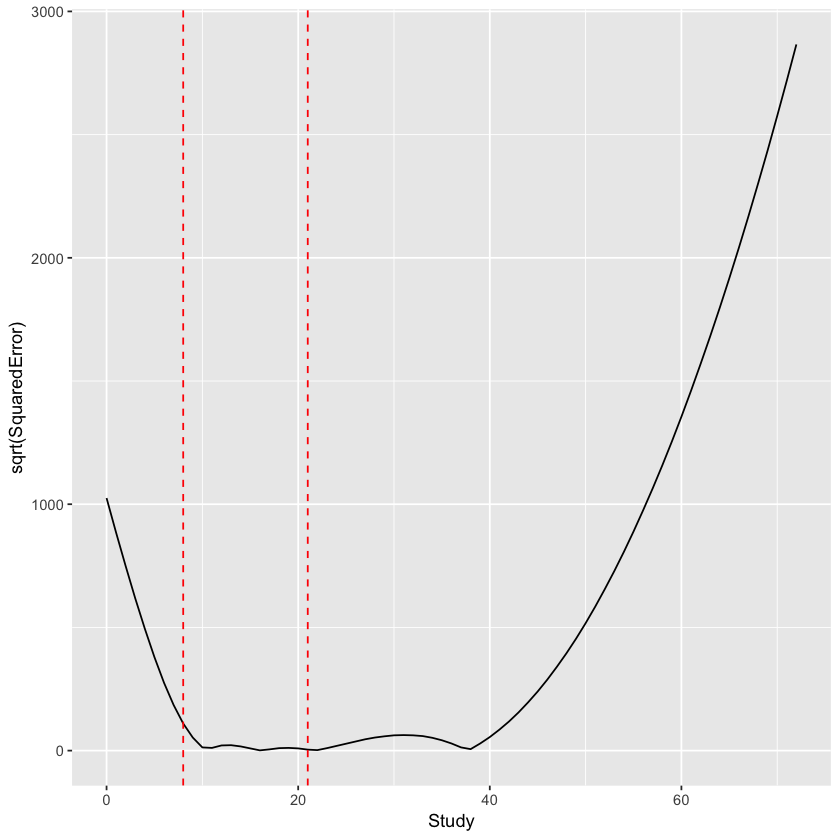

In [100]:
ggplot(Test, aes(x=Study, y=sqrt(SquaredError))) +
    geom_line() +
    geom_vline(xintercept=min(X$Study), linetype="dashed", color = "red") +
    geom_vline(xintercept=max(X$Study), linetype="dashed", color = "red")
cat(paste("Training Space Known by model:\n   Min Study Hours:",min(X$Study)),"\n   Max Study Hours:",max(X$Study))
RMSEWithin <- round(sqrt(mean(Test$SquaredError[which(Test$Study >= min(X$Study) & Test$Study <=max(X$Study))])))
RMSEBelow <- round(sqrt(mean(Test$SquaredError[which(Test$Study < min(X$Study))])))
RMSEAbove <- round(sqrt(mean(Test$SquaredError[which(Test$Study > max(X$Study))])))
cat(paste("\n\nAverage Root Mean Squared Error:\n   Below Known Range:",RMSEBelow, "\n   Within Known Range:",RMSEWithin,"\n   Above Known Range:",RMSEAbove))

As observed by the errors from the table and the plot above, it seems that our new function had somewhat better prediction capabilities within the training space which is represented by our horizontal lines. As expected, our new model is not able to predict out-of-sample data that falls outside of our training space.

In other words, our model is able to impute quite well the approximation of Students score by providing their time of Study and Sleep, in contrast, is not able to extrapolate very well outliers or data outside its training space.